In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

###Импорт пакетов и данных

In [2]:
!curl -O https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1748  100  1748    0     0  25333      0 --:--:-- --:--:-- --:--:-- 25333


In [3]:
df = pd.read_csv('AirPassengers.csv')
print(df.head(5))
print('-------------------------')
print(df.dtypes)

     Month  AirPassengers
0  1949-01            112
1  1949-02            118
2  1949-03            132
3  1949-04            129
4  1949-05            121
-------------------------
Month            object
AirPassengers     int64
dtype: object


In [4]:
df['Month'] = pd.DatetimeIndex(df['Month'])
print(df.dtypes)

Month            datetime64[ns]
AirPassengers             int64
dtype: object


In [5]:
df = df.rename(columns={'Month': 'ds','AirPassengers': 'y'})
print(df.head(5))
print('--------------------')
print(df.tail(5))
print('--------------------')
print(df.shape)

          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121
--------------------
            ds    y
139 1960-08-01  606
140 1960-09-01  508
141 1960-10-01  461
142 1960-11-01  390
143 1960-12-01  432
--------------------
(144, 2)


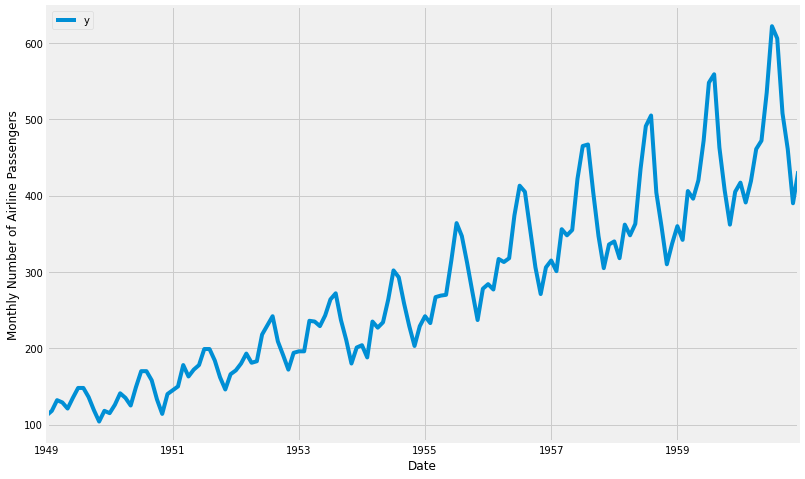

In [6]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')
plt.show()

###Прогнозирование временных рядов с помощью Prophet

In [7]:
prophet_model = Prophet(interval_width=0.95,
                        growth='linear',
                        daily_seasonality=False, 
                        weekly_seasonality=True, 
                        yearly_seasonality=True,
                        seasonality_mode = 'multiplicative',
                        )

In [8]:
prophet_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [9]:
future_dates = prophet_model.make_future_dataframe(periods=36, freq='MS')
print(future_dates.tail(5))
print('----------------------')
(future_dates.shape)

            ds
175 1963-08-01
176 1963-09-01
177 1963-10-01
178 1963-11-01
179 1963-12-01
----------------------


(180, 1)

In [10]:
forecast = prophet_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,105.806846,86.158149,124.993554
1,1949-02-01,97.793496,78.878374,115.579637
2,1949-03-01,113.734010,93.341037,131.411945
3,1949-04-01,118.956977,101.298753,137.828800
4,1949-05-01,120.002787,102.938978,138.395842


In [11]:
y_forecasted = forecast['yhat'].iloc[:144,]
y_truth = df['y']
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 92.72


In [12]:
#Prophet показывает значения временных рядов (черные точки), прогнозируемые значения (синяя линия) и интервалы неопределенности прогнозов (синие заштрихованные области).

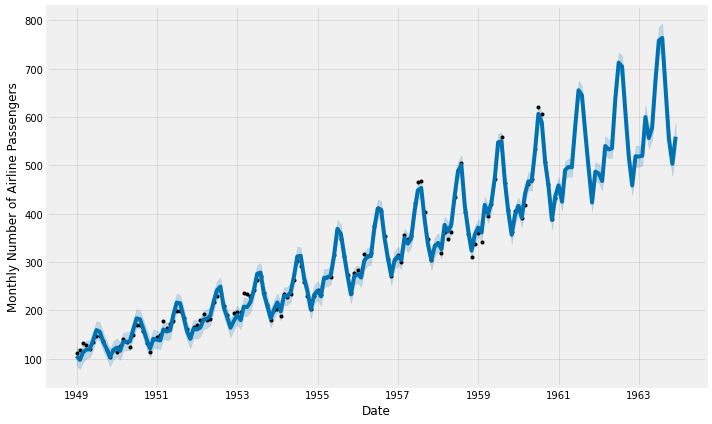

In [13]:
figure = prophet_model.plot(forecast,xlabel='Date', ylabel='Monthly Number of Airline Passengers',uncertainty=True)

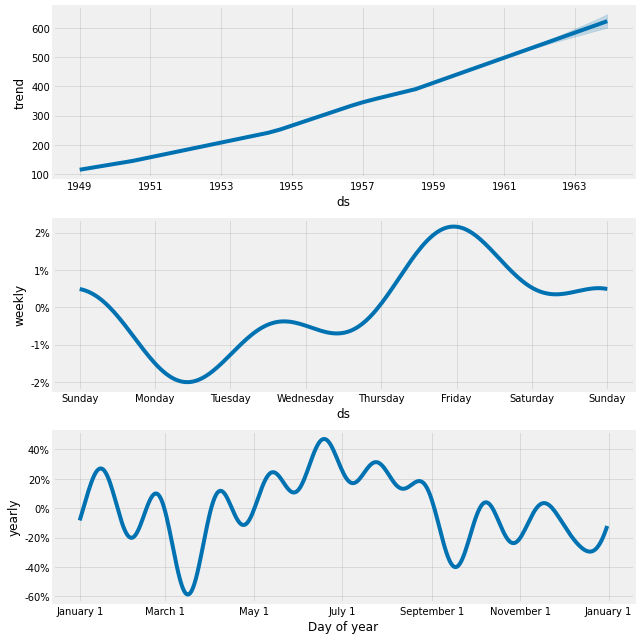

In [14]:
figure2 = prophet_model.plot_components(forecast)